Using TensorFlow backend.




> 44.221


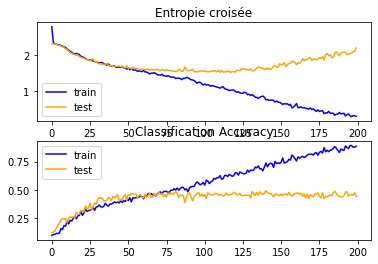

In [1]:
# Importation des librairies
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# Chargement et entrainement du dataset
# Note : en raison d'un trop long temps de chargement, seul une partie sera récupérée. En conséquence, les résultats peuvent être altérés)
def load_dataset():
	# Chargement du dataset
    # Note : le dataset est cifar10
	(trainX, trainY), (testX, testY) = cifar10.load_data()

	# Regroupement des valeurs en une catégories
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
    
    # Retourner les données
    # Note : pour des raisons de temps, seul une partie du cifar10 est traité. Pour utiliser l'intégralité, remplacer la ligne de retour par celle ci-dessous.
    # return trainX, trainY, testX, testY
	return trainX[0:799], trainY[0:799], testX[800:999], testY[800:999]

# Préparation des pixels
def prep_pixels(train, test):
	# Conversion des entiers en float32
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')

	# Normalisation de sorte que les valeurs soient comprises entre 0 et 1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	return train_norm, test_norm

# Implémentation du modèle cnn
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))

	# Compilation du modèle
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# Affichage des courbes d'appprentissage sur les graphiques
def summarize_diagnostics(history):
	# Affichage des pertes
	pyplot.subplot(211)
	pyplot.title('Entropie croisée')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.legend()

	# Affichage des efficatités
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	pyplot.legend()

    # Affichage des graphes
	pyplot.savefig('Résultats entrainement sans data amelioration.png')
	pyplot.show()
	pyplot.close()

# Exécution de la machine d'apprentissage
def run_test_harness():
    # Chargement du dataset
	trainX, trainY, testX, testY = load_dataset()

	# Exécution de la préparation des pixels
	trainX, testX = prep_pixels(trainX, testX)

	# Exécution de la modélisaton
	model = define_model()

	# Affinement du modèle
	history = model.fit(trainX, trainY, epochs=200, batch_size=64, validation_data=(testX, testY), verbose=0)

	# Evaluation du modèle
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

	# Apprenissage pour les courbes
	summarize_diagnostics(history)

# Début de l'application
run_test_harness()